## ROAR Visualiser
<b>By:</b> TingiDev<br>
<b>Start Date:</b> 26.04.2022

In [1]:
# Load friends
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx
from pyvis.network import Network
%matplotlib inline

## Token level analysis

In [2]:
fname = './test_token.json'
df = pd.read_json(fname, encoding='utf-8-sig')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   blockNumber        10000 non-null  int64         
 1   timeStamp          10000 non-null  datetime64[ns]
 2   hash               10000 non-null  object        
 3   nonce              10000 non-null  int64         
 4   blockHash          10000 non-null  object        
 5   from               10000 non-null  object        
 6   contractAddress    10000 non-null  object        
 7   to                 10000 non-null  object        
 8   value              10000 non-null  float64       
 9   tokenName          10000 non-null  object        
 10  tokenSymbol        10000 non-null  object        
 11  tokenDecimal       10000 non-null  int64         
 12  transactionIndex   10000 non-null  int64         
 13  gas                10000 non-null  int64         
 14  gasPric

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,14661843,2022-04-26 19:00:16,0x5648753754664b685a35111431a37721bfc9588f861d...,30881,0x0e8dcdac50954a828e4fa93ff11bd3295aa1854bbcb5...,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f,0x28c6c06298d514db089934071355e5743bf21d60,1.450000e+21,Synthetix Network Token,SNX,18,288,175858,50166586555,82453,23407298,deprecated,10
1,14661843,2022-04-26 19:00:16,0xe708f8b768cf6fba1e1be3a4c23c66b0ebf2b5069211...,52247,0x0e8dcdac50954a828e4fa93ff11bd3295aa1854bbcb5...,0x0084dfd7202e5f5c0c8be83503a492837ca3e95e,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f,0xc719fa9d2c4727e1bbb2f2941cfb1cffa24f23db,1.442814e+22,Synthetix Network Token,SNX,18,21,200000,62000000000,82477,2235245,deprecated,10
2,14661841,2022-04-26 18:59:25,0xe4c51d4027358c48f22bbd6de3d118b38616464966ae...,0,0x07e66e0fb5d81c5c658dcebfec3ea2a856c453d63c52...,0x0ca6e1e2502a2ea50ef8d7433629a1a8c1b3701b,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f,0x631c8e9193641cbf6f94a506340f2dec8cada395,3.129657e+23,Synthetix Network Token,SNX,18,219,250000,40539777815,99589,16708834,deprecated,12


## Account level analysis

In [3]:
fname = './test_account.json'
df = pd.read_json(fname, encoding='utf-8-sig')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   blockNumber        2010 non-null   int64         
 1   timeStamp          2010 non-null   datetime64[ns]
 2   hash               2010 non-null   object        
 3   nonce              2010 non-null   int64         
 4   blockHash          2010 non-null   object        
 5   from               2010 non-null   object        
 6   contractAddress    2010 non-null   object        
 7   to                 2010 non-null   object        
 8   value              2010 non-null   float64       
 9   tokenName          2010 non-null   object        
 10  tokenSymbol        2010 non-null   object        
 11  tokenDecimal       2010 non-null   int64         
 12  transactionIndex   2010 non-null   int64         
 13  gas                2010 non-null   int64         
 14  gasPrice

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,14661062,2022-04-26 16:00:37,0x587d6e0f0a9951b96b938a14c19da7d42928b7e9de18...,8614,0x38ab4a3b38a8c45e81024e70a1a59b49744aecc194e1...,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,0xca86d57519dbfe34a25eef0923b259ab07986b71,6.010501e+22,Immutable X,IMX,18,13,2998206,74683152037,2097449,4241987,deprecated,791
1,14661062,2022-04-26 16:00:37,0x587d6e0f0a9951b96b938a14c19da7d42928b7e9de18...,8614,0x38ab4a3b38a8c45e81024e70a1a59b49744aecc194e1...,0xca86d57519dbfe34a25eef0923b259ab07986b71,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x9008d19f58aabd9ed0d60971565aa8510560ab41,1.000000e+11,USD Coin,USDC,6,13,2998206,74683152037,2097449,4241987,deprecated,791
2,14658847,2022-04-26 07:28:39,0x380e970662bd522aae0ad0084b59183ff90dde33fd9e...,22783,0x2684c029184d63532c5ca16c16a2918b915949c522d9...,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,0xca86d57519dbfe34a25eef0923b259ab07986b71,5.516762e+22,Immutable X,IMX,18,3,1182727,35183361146,786743,1168044,deprecated,3006


In [4]:
# Get owner
owner = df['from'].value_counts().index[0] # soft coded
print('Owner:', owner)

Owner: 0xca86d57519dbfe34a25eef0923b259ab07986b71


In [5]:
# Get traded tokens
traded_tokens = df['tokenSymbol'].unique()
print(traded_tokens)

['IMX' 'USDC' 'fFOX-7' 'FOX' 'SPELL' 'SNX' 'FRAX' 'WETH' 'sUSD' 'SDS'
 'LUSD' 'fFOX-6' 'fFOX-79' 'VRN' 'dSNX' 'FOXy' 'fFOXy-79' 'FLX' 'WBTC'
 'ibbtc/sbtcCRV-f' 'bibbtc/sbtcCRV-f' 'REN' 'DYDX' 'LYRA' 'CNC' 'CVX'
 'CRV' 'DAI' 'X' 'BLUR' '3Crv' 'ibBTC' 'STG' 'OMT' 'TRIBL' 'ASW' 'ITHEUM'
 'BADGER' 'sifu' 'NEWO' 'SLP' 'SUCK' 'DHOLD' 'yvBOOST' 'YFI' 'SOLID'
 'LENS' 'USDT' 'AAVE' 'RAI3CRV' 'yvCurve-RAI' 'yveCRV-DAO' 'RAI' 'BENT'
 'crv3crypto' 'cDAI+cUSDC+USDT' 'GUSD' 'MIM' 'stkcvx3Crv-abra' 'GEL'
 'cvxCRV' 'ANY' 'sSPELL' 'ROOK' 'RBN' 'ZYNGA' 'STREATS' 'DISNEY' 'LDO'
 'Up1.org' 'ADIDAS' 'NFTs' 'MONA' 'A68.net' 'TRIBE' 'fTRIBE-8' 'tUSDC'
 'ryvUSDC-ETH-P-THETA' 'RSPT' 'bBADGER' 'KyDy.org' 'MIM-UST-f'
 'yvCurve-MIMUST' 'ENS' 'UST' 'musd3CRV' 'yvCurve-mUSD' 'ApMoney.org'
 'CHART']


In [6]:
# Get buy/sell actions
def get_action(to, owner):
    if (to == owner):
        action = 'buy'
    else:
        action = 'sell'
    return action

df['action'] = df['to'].apply(lambda x: get_action(x, owner))

In [7]:
# Get token balance
def get_balance(action, value, decimal):
    delta = value / 10**decimal
    if (action == 'sell'):
        delta = delta * -1
    return delta
df['delta'] = df.apply(lambda x: get_balance(x['action'], x['value'], x['tokenDecimal']), axis=1)

In [14]:
# Filter by token
token = 'IMX'
filt = df[df['tokenSymbol'] == token]

fig = go.Figure(go.Waterfall(
    name = token, orientation = "v",
    measure = ["relative"] * len(filt),
    x = [filt['timeStamp'],
#     x = [*range(len(filt))], # filt['timeStamp'],
    textposition = "outside",
    text = ["%0.1f" % x for x in filt['delta']],
    y = filt['delta'],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

# fig.update_layout(
#         title = f"Purchases and sales of ${token}",
# )

fig.show()

SyntaxError: invalid syntax (1195389847.py, line 9)

<BarContainer object of 115 artists>

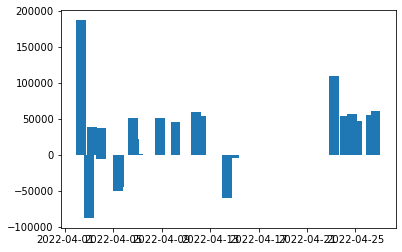

In [10]:
plt.bar(filt['timeStamp'], filt['delta'])

In [11]:
df

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,...,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations,action,delta
0,14661062,2022-04-26 16:00:37,0x587d6e0f0a9951b96b938a14c19da7d42928b7e9de18...,8614,0x38ab4a3b38a8c45e81024e70a1a59b49744aecc194e1...,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,0xca86d57519dbfe34a25eef0923b259ab07986b71,6.010501e+22,Immutable X,...,18,13,2998206,74683152037,2097449,4241987,deprecated,791,buy,6.010501e+04
1,14661062,2022-04-26 16:00:37,0x587d6e0f0a9951b96b938a14c19da7d42928b7e9de18...,8614,0x38ab4a3b38a8c45e81024e70a1a59b49744aecc194e1...,0xca86d57519dbfe34a25eef0923b259ab07986b71,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x9008d19f58aabd9ed0d60971565aa8510560ab41,1.000000e+11,USD Coin,...,6,13,2998206,74683152037,2097449,4241987,deprecated,791,sell,-1.000000e+05
2,14658847,2022-04-26 07:28:39,0x380e970662bd522aae0ad0084b59183ff90dde33fd9e...,22783,0x2684c029184d63532c5ca16c16a2918b915949c522d9...,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,0xca86d57519dbfe34a25eef0923b259ab07986b71,5.516762e+22,Immutable X,...,18,3,1182727,35183361146,786743,1168044,deprecated,3006,buy,5.516762e+04
3,14658847,2022-04-26 07:28:39,0x380e970662bd522aae0ad0084b59183ff90dde33fd9e...,22783,0x2684c029184d63532c5ca16c16a2918b915949c522d9...,0xca86d57519dbfe34a25eef0923b259ab07986b71,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x9008d19f58aabd9ed0d60971565aa8510560ab41,1.000000e+11,USD Coin,...,6,3,1182727,35183361146,786743,1168044,deprecated,3006,sell,-1.000000e+05
4,14658703,2022-04-26 06:51:58,0x51d86983a34dc6c515e978c9d21653b54e2775a86d3d...,22778,0x93ca5fe1bc424264c0059650a5bd4deb68d72f577254...,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,0xca86d57519dbfe34a25eef0923b259ab07986b71,5.548303e+22,Immutable X,...,18,9,682314,27900832870,461317,1943331,deprecated,3150,buy,5.548303e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,13477194,2021-10-24 01:12:47,0x29d2c3b93816052c56934be1abdbf87af0287ca65377...,3342,0xd5a98d7a30541077b9adaa09bdd1446317e2f912060f...,0xbcfd5dbec5f49230210e0be85cee183097e840aa,0x6c3f90f043a72fa612cbac8115ee7e52bde6e490,0xca86d57519dbfe34a25eef0923b259ab07986b71,1.682359e+22,Curve.fi DAI/USDC/USDT,...,18,143,51150,80307376283,46350,7866791,deprecated,1184659,buy,1.682359e+04
2006,13476773,2021-10-23 23:33:57,0x295fa442d17ee8daa052fc602f897e9b4bf6764e6a04...,1,0xdeae2400a3849bdc50e5b27e04ea2054afe7eef9c56e...,0xca86d57519dbfe34a25eef0923b259ab07986b71,0x62b9c7356a2dc64a1969e19c23e4f579f9810aa7,0x3fe65692bfcd0e6cf84cb1e7d24108e434a7587e,2.676386e+24,Convex CRV,...,18,163,176458,87382579244,171658,14487054,deprecated,1185080,sell,-2.676386e+06
2007,13476733,2021-10-23 23:21:34,0x2df5c1d1c1ac646e2768708e094e50c83b83bbb05de4...,3338,0x3f1210bc8d525e1e33059034786f0ae1877499a21553...,0xbcfd5dbec5f49230210e0be85cee183097e840aa,0x62b9c7356a2dc64a1969e19c23e4f579f9810aa7,0xca86d57519dbfe34a25eef0923b259ab07986b71,2.676386e+24,Convex CRV,...,18,163,77572,62140641764,46915,14204982,deprecated,1185120,buy,2.676386e+06
2008,13476698,2021-10-23 23:14:47,0xc3e296394d60dae3ad2e6e9ac23bb3eea49abcb15f43...,3336,0xe8723c0e463ab335674ef91b9d51027e4662cef30005...,0xbcfd5dbec5f49230210e0be85cee183097e840aa,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xca86d57519dbfe34a25eef0923b259ab07986b71,7.167326e+10,USD Coin,...,6,95,99262,83486083987,60837,6459484,deprecated,1185155,buy,7.167326e+04
